# General imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
# Load the data
df = pd.read_csv('data.csv')

# Create data frame

In [4]:
df.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,LATITUDE,LONGITUDE,YEAR_SOLD,MONTH_SOLD
0,1,01 ONE FAMILY HOMES,1,S1,15 AVENUE D,10009.0,1.0,1.0,826.0,2240.0,1,S1,593362.0,40.720574,-73.978498,2010,4
1,1,02 TWO FAMILY HOMES,1,S2,91 AVENUE D,10009.0,2.0,1.0,994.0,3799.0,1,S2,1320000.0,40.723029,-73.976691,2010,2
2,1,03 THREE FAMILY HOMES,1,C0,326 EAST 4TH STREET,10009.0,3.0,0.0,2204.0,3921.0,1,C0,900000.0,40.721776,-73.979224,2010,12
3,1,04 TAX CLASS 1 CONDOS,1C,R6,238 EAST 4TH STREET,10009.0,1.0,0.0,0.0,0.0,1,R6,3027375.0,40.723353,-73.982947,2010,8
4,1,07 RENTALS - WALKUP APARTMENTS,2,C7,11 AVENUE D,10009.0,16.0,3.0,3419.0,14400.0,2,C7,8000000.0,40.720526,-73.978628,2010,2


# Clean data frame

In [5]:
# Convert values to numeric
df['ZIP CODE'] = pd.to_numeric(df['ZIP CODE'], errors='coerce')
df['RESIDENTIAL UNITS'] = pd.to_numeric(df['RESIDENTIAL UNITS'], errors='coerce')
df['COMMERCIAL UNITS'] = pd.to_numeric(df['COMMERCIAL UNITS'], errors='coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

# Label encoding
label_encoder = preprocessing.LabelEncoder()
df['NEIGHBORHOOD'] = label_encoder.fit_transform(df['NEIGHBORHOOD'])

In [6]:
# Convert PRICES to
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

# Convert GROSS SQUARE FEET column values to numeric
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

In [7]:
null_values = df.isna()

pct_null = (null_values.mean() * 100).round(10)

print("Percentage of null values:")
print(pct_null)

Percentage of null values:
NEIGHBORHOOD                      0.0
BUILDING CLASS CATEGORY           0.0
TAX CLASS AT PRESENT              0.0
BUILDING CLASS AT PRESENT         0.0
ADDRESS                           0.0
ZIP CODE                          0.0
RESIDENTIAL UNITS                 0.0
COMMERCIAL UNITS                  0.0
LAND SQUARE FEET                  0.0
GROSS SQUARE FEET                 0.0
TAX CLASS AT TIME OF SALE         0.0
BUILDING CLASS AT TIME OF SALE    0.0
SALE PRICE                        0.0
LATITUDE                          0.0
LONGITUDE                         0.0
YEAR_SOLD                         0.0
MONTH_SOLD                        0.0
dtype: float64


In [8]:
df.shape

(311283, 17)

In [9]:
print(df.dtypes)


NEIGHBORHOOD                        int64
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
ZIP CODE                          float64
RESIDENTIAL UNITS                 float64
COMMERCIAL UNITS                  float64
LAND SQUARE FEET                  float64
GROSS SQUARE FEET                 float64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                        float64
LATITUDE                          float64
LONGITUDE                         float64
YEAR_SOLD                           int64
MONTH_SOLD                          int64
dtype: object


In [10]:
# Contar o número de NaN por coluna
print(df.isna().sum())

NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
LATITUDE                          0
LONGITUDE                         0
YEAR_SOLD                         0
MONTH_SOLD                        0
dtype: int64


In [11]:
df.describe()

,NEIGHBORHOOD,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,SALE PRICE,LATITUDE,LONGITUDE,YEAR_SOLD,MONTH_SOLD
count,311283.000000,311283.000000,311283.000000,311283.000000,311283.000000,311283.000000,311283.000000,3.112830e+05,311283.000000,311283.000000,311283.000000,311283.000000
mean,45.548549,10029.359117,1.785372,0.347227,797.793224,6387.181835,2.300627,2.282422e+06,40.672223,-73.367703,2010.510025,6.589380
std,20.993594,38.170134,13.351147,4.000125,3591.966286,27904.025884,0.749531,9.621848e+06,2.561457,12.066826,4.952774,3.356937
min,0.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,-46.598362,-165.106380,2003.000000,1.000000
25%,24.000000,10014.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.750000e+05,40.754993,-73.983179,2006.000000,4.000000
50%,49.000000,10021.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.490000e+05,40.774166,-73.967596,2010.000000,7.000000
75%,63.000000,10026.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.625000e+06,40.777048,-73.967596,2015.000000,9.000000
max,76.000000,10463.000000,764.000000,570.000000,149560.000000,420000.000000,4.000000,3.000000e+08,64.843318,176.164822,2023.000000,12.000000


# Filter coordinates outside Manhattan. (Used Geocodify API so there can be errors)

In [12]:
from shapely.geometry import Point, Polygon

def FilterManhattanCoordinates(df):
    # These coordinates form a polygon that approximates Manhattan's shape
    MANHATTAN_CORDS = [
        (40.698005, -74.016173),
        (40.704772, -74.021498),
        (40.756209, -74.012266),
        (40.878978, -73.929209),
        (40.875195, -73.918612),
        (40.872910, -73.909668),
        (40.863531, -73.914005),
        (40.846438, -73.927714),
        (40.834556, -73.934069),
        (40.808835, -73.933640),
        (40.800519, -73.927370),
        (40.792851, -73.929260),
        (40.781284, -73.940080),
        (40.775369, -73.940080),
        (40.741822, -73.970742),
        (40.728637, -73.964892),
        (40.710145, -73.975104),
        (40.705981, -73.997177),
        (40.699799, -74.004993),
        (40.698005, -74.016173)  # Back to start
    ]

    MANHATTAN_POLY = Polygon(MANHATTAN_CORDS)

    # Create a mask for points within Manhattan
    def IsInManhattan(row):
        point = Point(row['LATITUDE'], row['LONGITUDE'])
        return MANHATTAN_POLY.contains(point)

    # Apply the filter
    manhattan_mask = df.apply(IsInManhattan, axis=1)
    manhattan_df = df[manhattan_mask].copy()

    return manhattan_df

# Filter coordinates outside Manhattan
df = FilterManhattanCoordinates(df)

# Display graphics

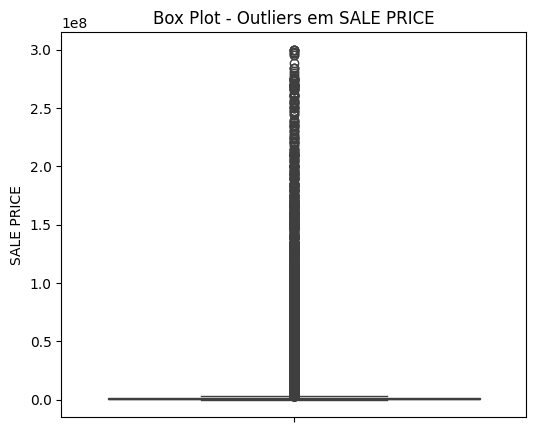

In [13]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=df["SALE PRICE"])
plt.title("Box Plot - Outliers em SALE PRICE")
plt.ylabel("SALE PRICE")
plt.show()


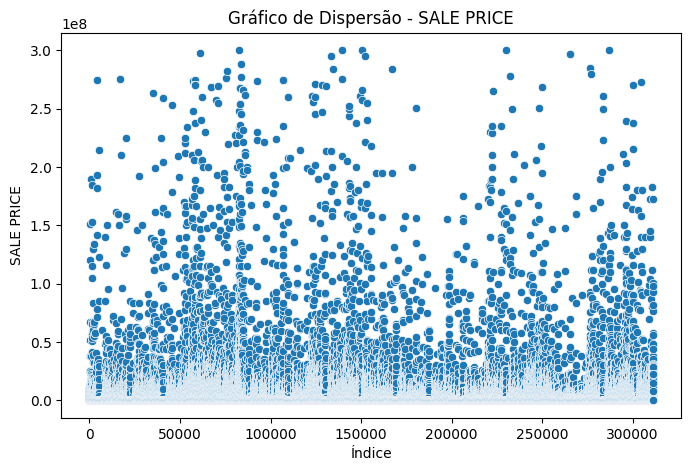

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df.index, y=df["SALE PRICE"])
plt.title("Gráfico de Dispersão - SALE PRICE")
plt.xlabel("Índice")
plt.ylabel("SALE PRICE")
plt.show()


In [15]:
top_n = df.nlargest(5, "SALE PRICE")
top_n


,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,LATITUDE,LONGITUDE,YEAR_SOLD,MONTH_SOLD
82599,16,21 OFFICE BUILDINGS,4,O4,360 PARK AVENUE SOUTH,10010.0,0.0,2.0,19750.0,389000.0,4,O4,300000000.0,40.741973,-73.985293,2021,12
139648,68,21 OFFICE BUILDINGS,4,O6,1865 BROADWAY,10023.0,0.0,5.0,22847.0,139761.0,4,O3,300000000.0,40.770124,-73.982479,2015,1
150766,49,43 CONDO OFFICE BUILDINGS,4,RB,530 FIFTH AVENUE,10036.0,0.0,0.0,0.0,0.0,4,RB,300000000.0,40.777048,-73.967596,2014,10
229979,49,21 OFFICE BUILDINGS,4,O3,1466 BROADWAY,10036.0,0.0,7.0,19800.0,0.0,4,O3,300000000.0,40.755464,-73.986305,2007,2
286666,53,08 RENTALS - ELEVATOR APARTMENTS,2,D8,7 EAST 28TH STREET,10016.0,397.0,1.0,21181.0,388946.0,2,D8,300000000.0,40.744374,-73.986578,2012,12


In [16]:
df = df.drop(df[df["SALE PRICE"] > 300_000_000].index)


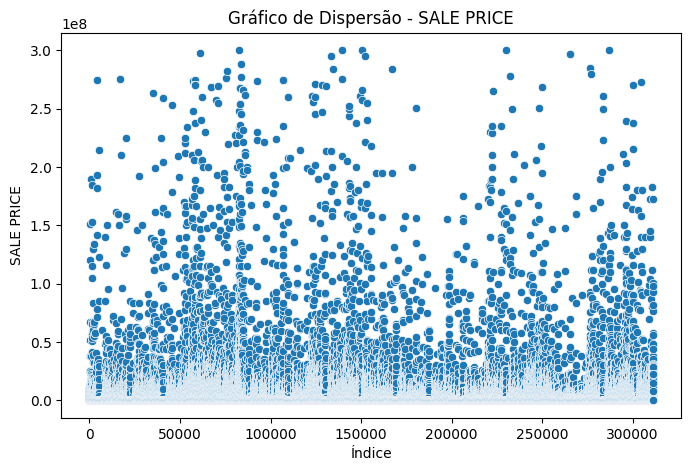

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df.index, y=df["SALE PRICE"])
plt.title("Gráfico de Dispersão - SALE PRICE")
plt.xlabel("Índice")
plt.ylabel("SALE PRICE")
plt.show()

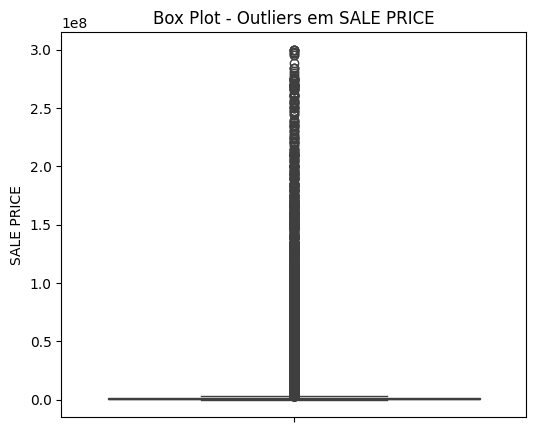

In [18]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=df["SALE PRICE"])
plt.title("Box Plot - Outliers em SALE PRICE")
plt.ylabel("SALE PRICE")
plt.show()

In [19]:
df.columns

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'LATITUDE', 'LONGITUDE', 'YEAR_SOLD', 'MONTH_SOLD'],
      dtype='object')

In [20]:
df.nunique()


NEIGHBORHOOD                          77
BUILDING CLASS CATEGORY              137
TAX CLASS AT PRESENT                  11
BUILDING CLASS AT PRESENT            174
ADDRESS                           144747
ZIP CODE                              70
RESIDENTIAL UNITS                    287
COMMERCIAL UNITS                     120
LAND SQUARE FEET                    4808
GROSS SQUARE FEET                  10257
TAX CLASS AT TIME OF SALE              4
BUILDING CLASS AT TIME OF SALE       177
SALE PRICE                         46461
LATITUDE                           22848
LONGITUDE                          22051
YEAR_SOLD                             21
MONTH_SOLD                            12
dtype: int64

In [21]:
df["YEAR_SOLD"].unique()

array([2010, 2008, 2011, 2013, 2023, 2019, 2020, 2018, 2021, 2022, 2006,
       2015, 2014, 2005, 2009, 2004, 2007, 2017, 2003, 2012, 2016])

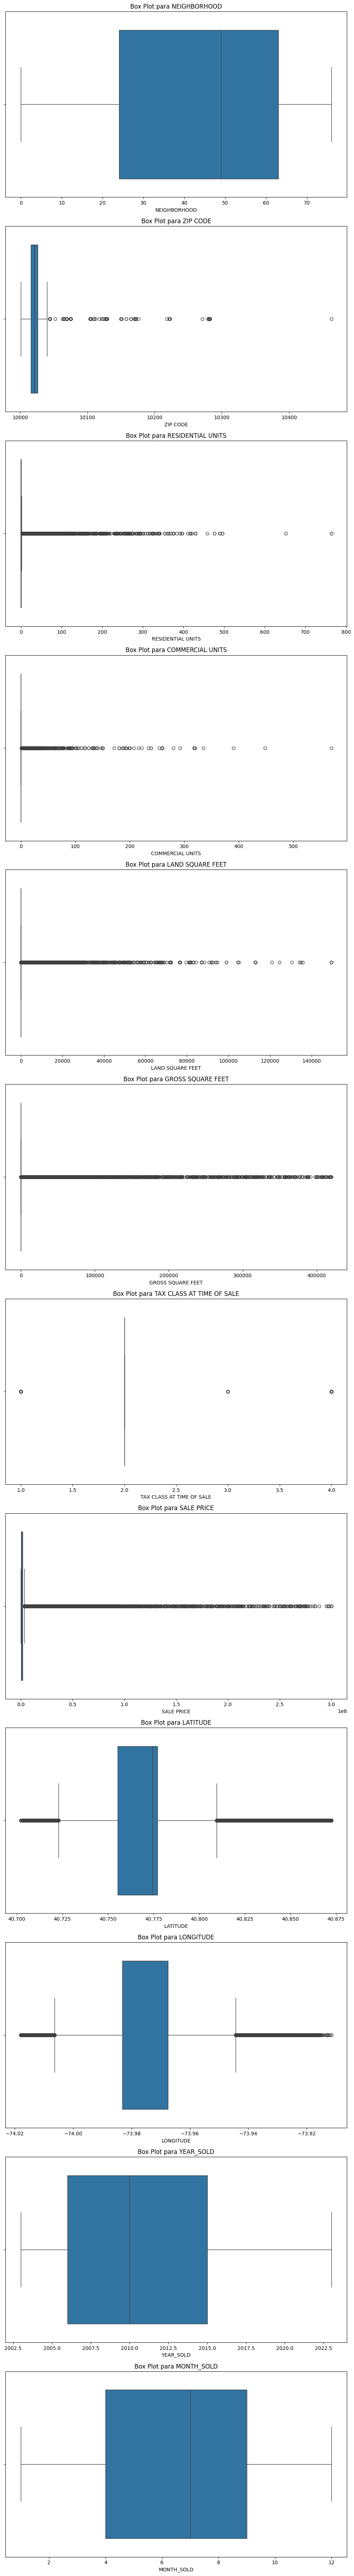

In [22]:

# Selecionar apenas as colunas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Definir o número de subplots
num_cols = len(numeric_df.columns)
fig, axes = plt.subplots(nrows=num_cols, figsize=(10, 6*num_cols))

# Criar um box plot para cada coluna numérica
for i, col in enumerate(numeric_df.columns):
    sns.boxplot(x=numeric_df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot para {col}')

plt.tight_layout()
plt.show()


In [23]:
df[df["ZIP CODE"] == 0].shape

(0, 17)

In [24]:
df = df.drop(df[df["LAND SQUARE FEET"] > 170_000].index)
df = df.drop(df[df["GROSS SQUARE FEET"] > 420_000].index)
df = df.drop(df[df["ZIP CODE"] == 0].index)
df = df.drop(df[df["COMMERCIAL UNITS"] > 1000].index)
df = df.drop(df[df["RESIDENTIAL UNITS"] > 6000].index)


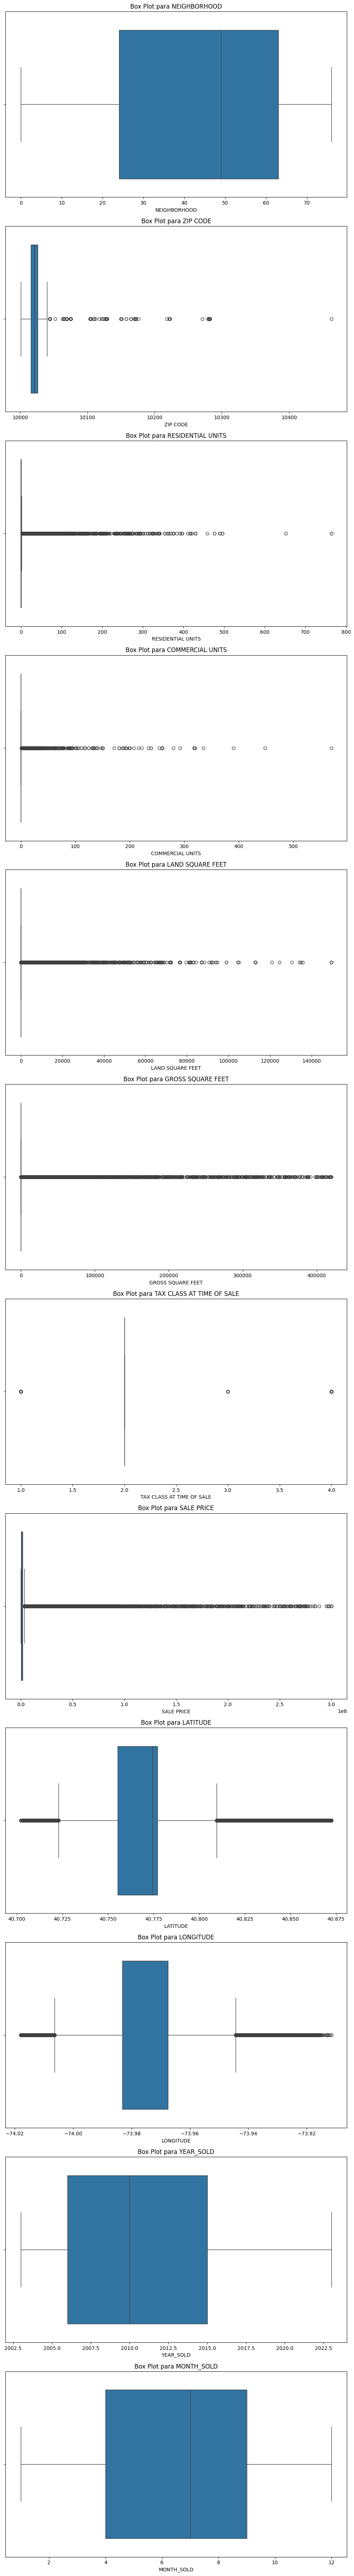

In [25]:

# Selecionar apenas as colunas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Definir o número de subplots
num_cols = len(numeric_df.columns)
fig, axes = plt.subplots(nrows=num_cols, figsize=(10, 6*num_cols))

# Criar um box plot para cada coluna numérica
for i, col in enumerate(numeric_df.columns):
    sns.boxplot(x=numeric_df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot para {col}')

plt.tight_layout()
plt.show()


In [26]:
df.shape

(304861, 17)

In [27]:
df[df["ZIP CODE"] == 0].shape

(0, 17)

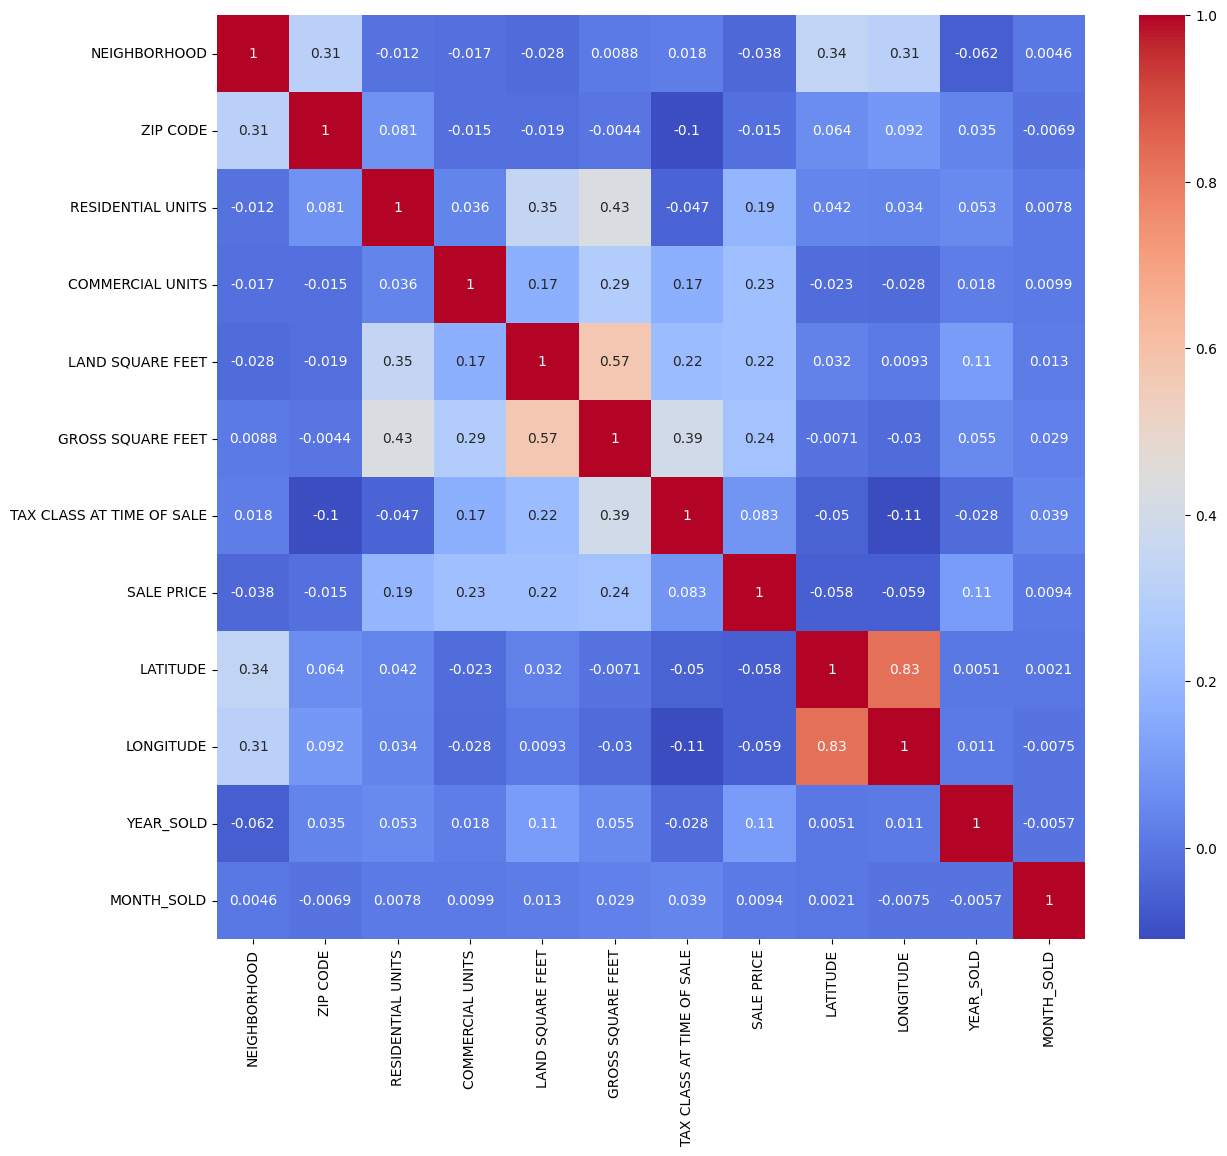

In [28]:
numeric_df = df.select_dtypes(include=['number'])

# Calcular a correlação e criar o heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [29]:
df.columns

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'LATITUDE', 'LONGITUDE', 'YEAR_SOLD', 'MONTH_SOLD'],
      dtype='object')

In [30]:
df_ano = df.groupby(df["YEAR_SOLD"])["SALE PRICE"].mean().reset_index()

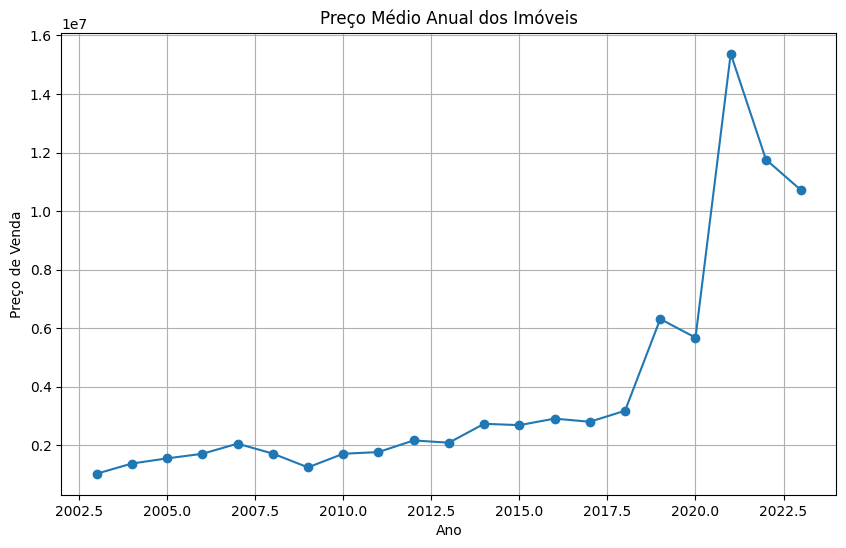

In [31]:
# Cria o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df_ano["YEAR_SOLD"], df_ano["SALE PRICE"], marker='o', linestyle='-')
plt.title("Preço Médio Anual dos Imóveis")
plt.xlabel("Ano")
plt.ylabel("Preço de Venda")
plt.grid(True)
plt.show()

In [32]:
# Check NA 'LATITUDE' and 'LONGITUDE' rows
df[df['LATITUDE'].isna() & df['LONGITUDE'].isna()]

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,LATITUDE,LONGITUDE,YEAR_SOLD,MONTH_SOLD


In [ ]:
import plotly.express as px

# First group the data to count sales at each coordinate
location_counts = df.groupby(['LATITUDE', 'LONGITUDE']).agg({
    'ADDRESS': 'first',  # Keep one address for hover info
    'SALE PRICE': 'count',  # Count number of sales
}).reset_index()

# Rename the count column for clarity
location_counts = location_counts.rename(columns={'SALE PRICE': 'Number of Sales'})

# Create the interactive map
fig = px.scatter_map(
    location_counts,
    lat="LATITUDE",
    lon="LONGITUDE",
    hover_name="ADDRESS",
    hover_data=["Number of Sales"],
    color="Number of Sales",  # Color now based on number of sales
    color_continuous_scale="inferno",  # Keep your original color scale
    size="Number of Sales",  # Make point size reflect number of sales
    size_max=15,  # Adjust maximum size of points
    zoom=10,
    height=600
)

# Map configurations (keeping your original settings)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.update_layout(title="Map of Sales Frequency")

# Show the plot
fig.show()


/var/folders/lr/krlh98j911sf2x06fllglx8w0000gn/T/ipykernel_99469/3412365936.py:13: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [34]:
# Also delete a row which coordinates falls inside Central Park
# df = df.drop(df[df['LATITUDE'].round(5) == 40.77705].index)

df[(df['LATITUDE'] == 40.777048) & (df['LONGITUDE'] == -73.967596)]

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,LATITUDE,LONGITUDE,YEAR_SOLD,MONTH_SOLD
19,1,09 COOPS - WALKUP APARTMENTS,2,C6,"206 EAST 7TH STREET, 1920",10009.0,0.0,0.0,0.0,0.0,2,C6,518950.0,40.777048,-73.967596,2010,2
20,1,09 COOPS - WALKUP APARTMENTS,2,C6,"633 EAST 11 STREET, 10",10009.0,0.0,0.0,0.0,0.0,2,C6,400000.0,40.777048,-73.967596,2010,2
21,1,09 COOPS - WALKUP APARTMENTS,2,C6,"633 EAST 11TH STREET, 2",10009.0,0.0,0.0,0.0,0.0,2,C6,420000.0,40.777048,-73.967596,2010,4
24,1,09 COOPS - WALKUP APARTMENTS,2,C6,"527 EAST 12TH, A6",10009.0,0.0,0.0,0.0,0.0,2,C6,336000.0,40.777048,-73.967596,2010,1
25,1,09 COOPS - WALKUP APARTMENTS,2,C6,"507 EAST 12TH STREET, 3A",10009.0,0.0,0.0,0.0,0.0,2,C6,420000.0,40.777048,-73.967596,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311278,25,07 RENTALS - WALKUP APARTMENTS,2B,C7,"152 EAST 116TH STREET, 1",10029.0,8.0,2.0,2523.0,9750.0,2,C7,42500.0,40.777048,-73.967596,2023,12
311279,25,07 RENTALS - WALKUP APARTMENTS,2B,C7,"152 EAST 116TH STREET, 3",10029.0,8.0,2.0,2523.0,9750.0,2,C7,42500.0,40.777048,-73.967596,2023,12
311280,25,07 RENTALS - WALKUP APARTMENTS,2B,C7,"152 EAST 116TH STREET, 4",10029.0,8.0,2.0,2523.0,9750.0,2,C7,248854.0,40.777048,-73.967596,2023,12
311281,25,07 RENTALS - WALKUP APARTMENTS,2B,C7,"152 EAST 116TH STREET, 5",10029.0,8.0,2.0,2523.0,9750.0,2,C7,248854.0,40.777048,-73.967596,2023,12
